# Import Required Libraries
Import essential libraries for data manipulation, visualization, and machine learning including pandas, numpy, matplotlib, seaborn, and sklearn components.

In [3]:
# Importing essential libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn components for preprocessing, model building, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Data Loading and Exploration
Load the loan dataset and perform comprehensive exploratory data analysis including statistical summaries, data shape, distribution of variables, correlation analysis, and visualizations to understand the data structure and relationships.

In [4]:
# Load the dataset
df = pd.read_csv('Finance.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Display the shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Display basic information about the dataset
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset Shape: (614, 13)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("\nMissing Values Analysis:")
display(missing_data[missing_data['Missing Values'] > 0])


Missing Values Analysis:


,Missing Values,Percentage
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322


In [6]:
# Display statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
display(df.describe())


Statistical Summary of Numerical Columns:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


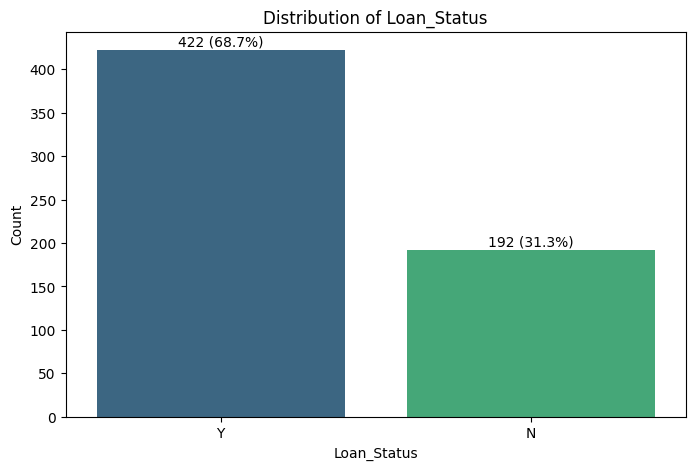

In [7]:
# 2. DATA VISUALIZATION
# Visualize the distribution of the target variable 'Loan_Status'
plt.figure(figsize=(8, 5))
loan_status_counts = df['Loan_Status'].value_counts()
sns.countplot(x='Loan_Status', data=df, palette='viridis')
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
for i, count in enumerate(loan_status_counts):
    plt.text(i, count + 5, f"{count} ({count/len(df):.1%})", ha='center')
plt.show()

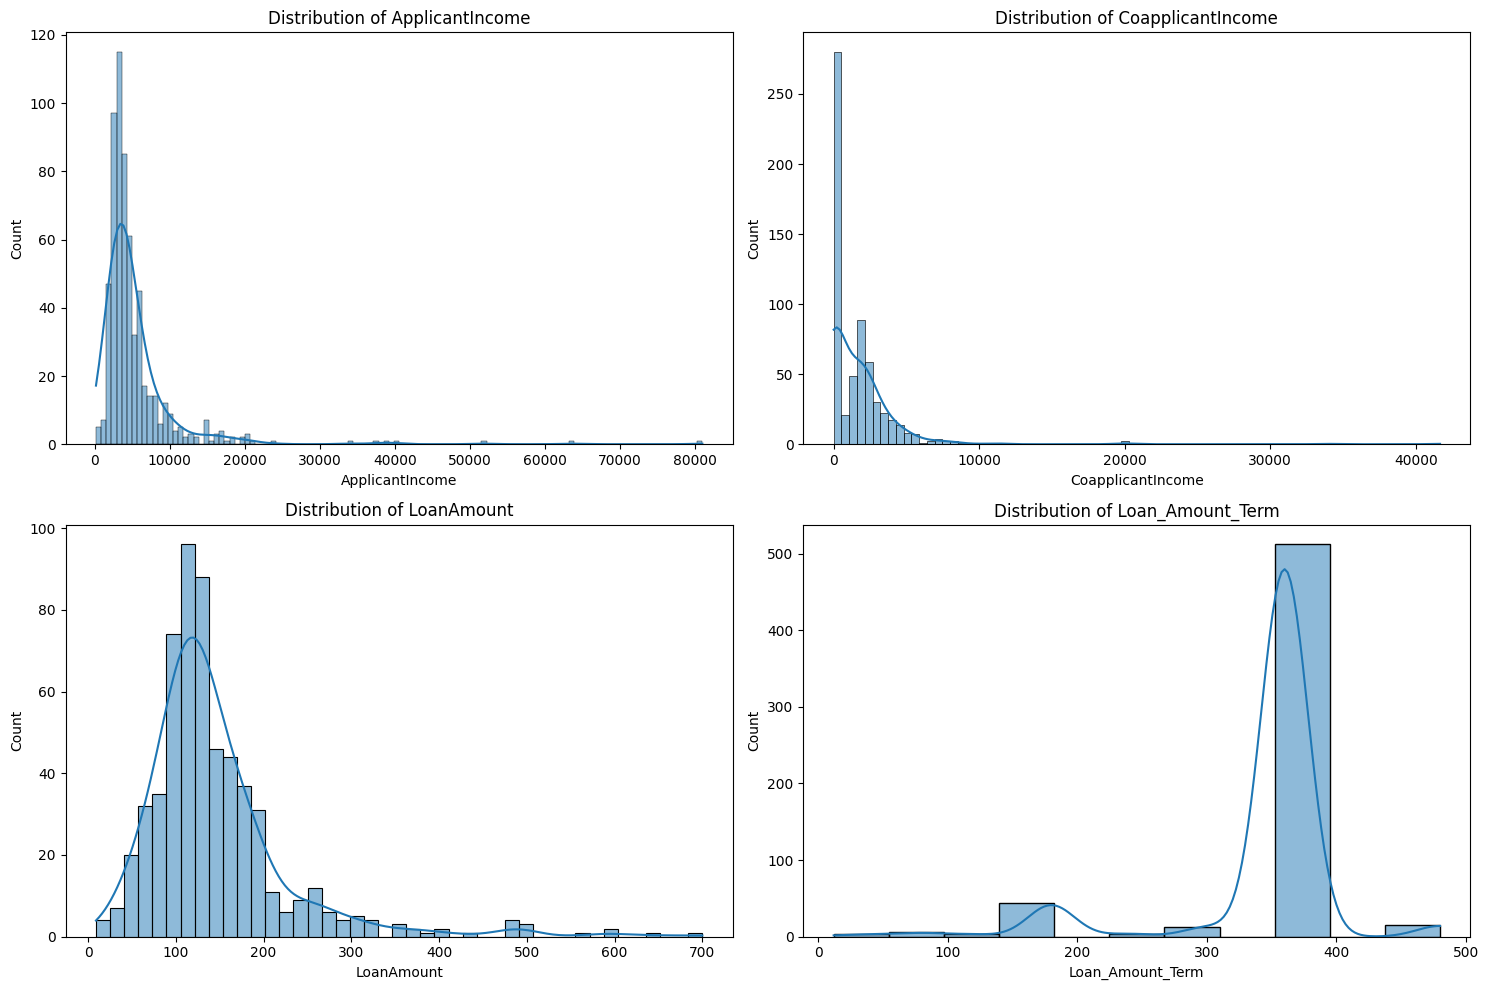

In [8]:
# Visualize the distribution of numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

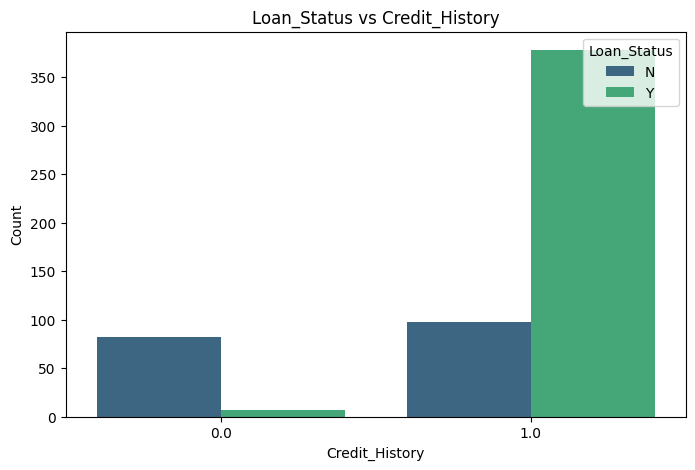

In [9]:
# Visualize the relationship between 'Loan_Status' and 'Credit_History'
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan_Status vs Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.legend(title='Loan_Status', loc='upper right')
plt.show()

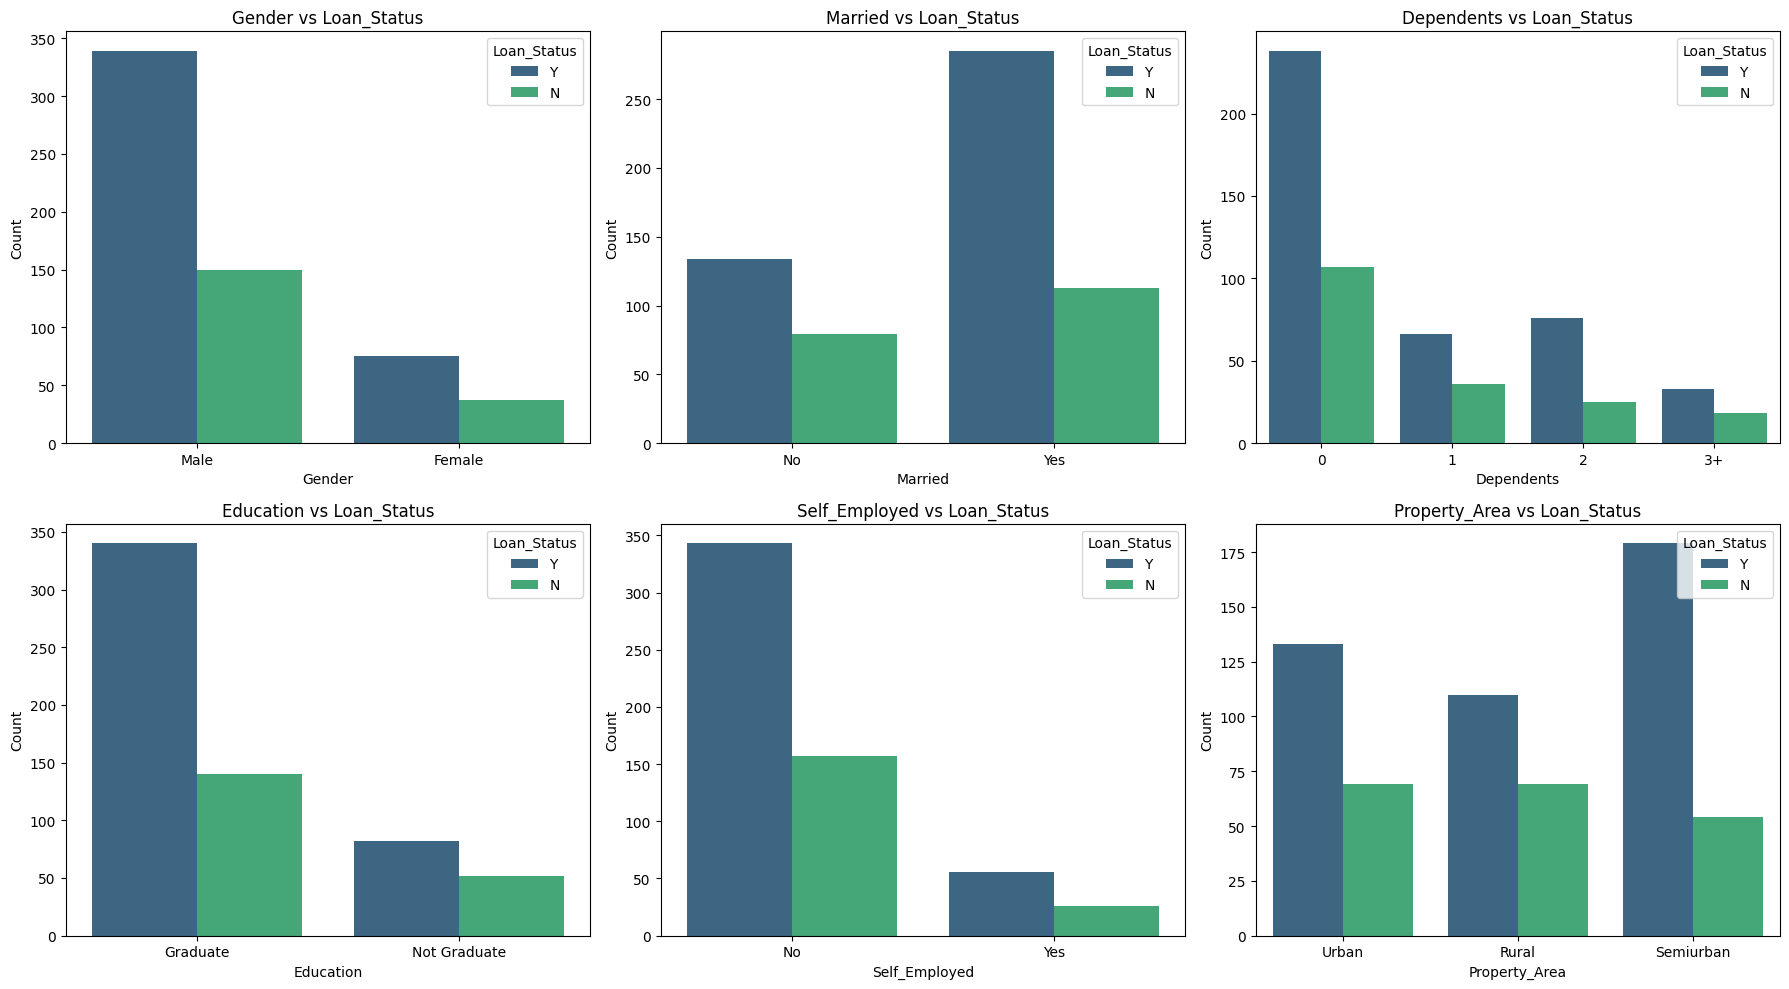

In [10]:
# Visualize categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Loan_Status', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} vs Loan_Status')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Loan_Status', loc='upper right')
plt.tight_layout()
plt.show()

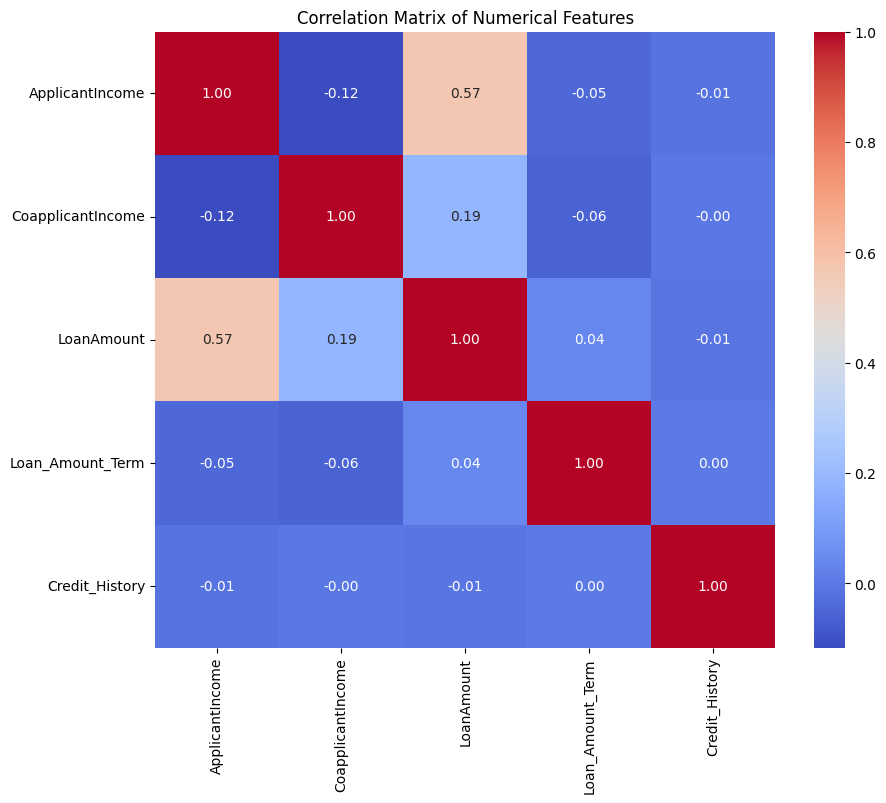

In [11]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Data Cleaning and Preprocessing
Handle missing values using appropriate imputation techniques, detect and treat outliers, encode categorical variables, and perform feature scaling to prepare the data for modeling.

In [12]:
# Handle missing values using appropriate imputation techniques
# Fill missing values in categorical columns with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing values in numerical columns with the median
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Detect and treat outliers in the 'LoanAmount' column using the IQR method
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['LoanAmount'] = np.where(df['LoanAmount'] > upper_bound, upper_bound, df['LoanAmount'])

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in categorical_columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Perform feature scaling on numerical columns
scaler = StandardScaler()
numerical_columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[numerical_columns_to_scale] = scaler.fit_transform(df[numerical_columns_to_scale])

# Display the cleaned and preprocessed dataset
df.head()

# Verify that there are no missing values left
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values After Cleaning:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Feature Engineering
Create new features from existing ones that might improve model performance, such as debt-to-income ratio, loan amount to income ratio, and other domain-specific features that could be predictive of loan approval.

In [13]:
# Feature Engineering

# Create a new feature: Debt-to-Income Ratio
df['Debt_to_Income_Ratio'] = (df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'])).replace([np.inf, -np.inf], 0)

# Create a new feature: Loan Amount to Income Ratio
df['Loan_Amount_to_Income_Ratio'] = df['LoanAmount'] / df['ApplicantIncome']

# Create a new feature: Total Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Create a new feature: Income Stability (categorical based on Total Income)
df['Income_Stability'] = pd.cut(df['Total_Income'], bins=[-np.inf, 2500, 5000, 10000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# Encode the new categorical feature 'Income_Stability' using Label Encoding
df['Income_Stability'] = label_encoder.fit_transform(df['Income_Stability'])

# Display the dataset with the new features
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Debt_to_Income_Ratio,Loan_Amount_to_Income_Ratio,Total_Income,Income_Stability
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.168041,360.0,1.0,2,1,0.348997,-2.302218,-0.481497,0
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.168041,360.0,1.0,0,0,0.970529,1.250192,-0.173144,0
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-1.280462,360.0,1.0,2,1,1.350364,3.251988,-0.948235,0
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.311579,360.0,1.0,2,1,1.483124,0.674322,-0.210083,0
4,LP001008,1,0,0,0,0,0.097728,-0.554487,0.065209,360.0,1.0,2,1,-0.142764,0.667244,-0.456759,0


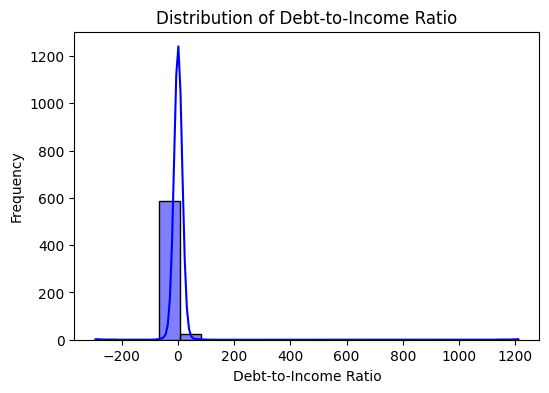

In [14]:
# Visualize the distribution of the new feature 'Debt_to_Income_Ratio'
plt.figure(figsize=(6, 4))
sns.histplot(df['Debt_to_Income_Ratio'], kde=True, color='blue', bins=20)
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

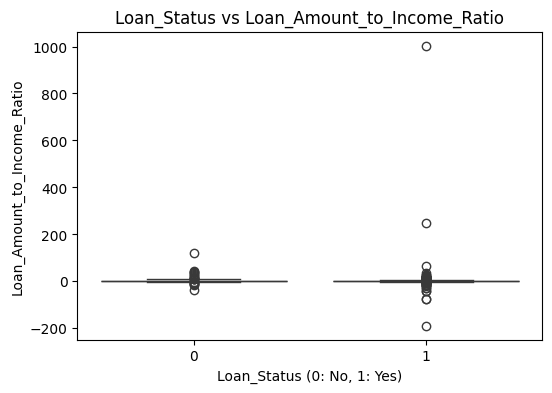

In [15]:
# Visualize the relationship between 'Loan_Status' and 'Loan_Amount_to_Income_Ratio'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Status', y='Loan_Amount_to_Income_Ratio', data=df, palette='viridis')
plt.title('Loan_Status vs Loan_Amount_to_Income_Ratio')
plt.xlabel('Loan_Status (0: No, 1: Yes)')
plt.ylabel('Loan_Amount_to_Income_Ratio')
plt.show()

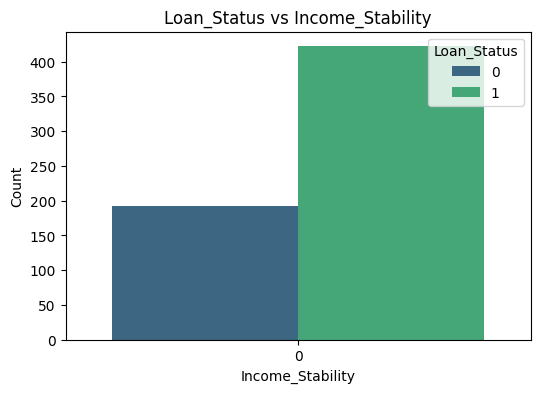

In [16]:
# Visualize the relationship between 'Loan_Status' and 'Income_Stability'
plt.figure(figsize=(6, 4))
sns.countplot(x='Income_Stability', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan_Status vs Income_Stability')
plt.xlabel('Income_Stability')
plt.ylabel('Count')
plt.legend(title='Loan_Status', loc='upper right')
plt.show()

# Data Splitting and Feature Scaling
Split the dataset into training and testing sets, apply feature scaling (StandardScaler or MinMaxScaler) to ensure all features are on similar scales for optimal model performance.

In [21]:
# Split the dataset into training and testing sets
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)  # Features
y = df['Loan_Status']  # Target variable

# Handle the 'Dependents' column which contains categorical values like '3+'
# Use Label Encoding for 'Dependents' column
if 'Dependents' in X.columns and X['Dependents'].dtype == 'object':
    X['Dependents'] = label_encoder.fit_transform(X['Dependents'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for better interpretability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the shapes of the training and testing sets
print(f"Training Set Shape: {X_train_scaled.shape}, Testing Set Shape: {X_test_scaled.shape}")

Training Set Shape: (491, 15), Testing Set Shape: (123, 15)


# Model Building and Evaluation
Implement multiple machine learning models including Logistic Regression, Random Forest, Decision Tree, and other relevant algorithms. Evaluate each model using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)
logistic_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_classification_report = classification_report(y_test, logistic_predictions)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print("Classification Report:\n", logistic_classification_report)

Logistic Regression Evaluation:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



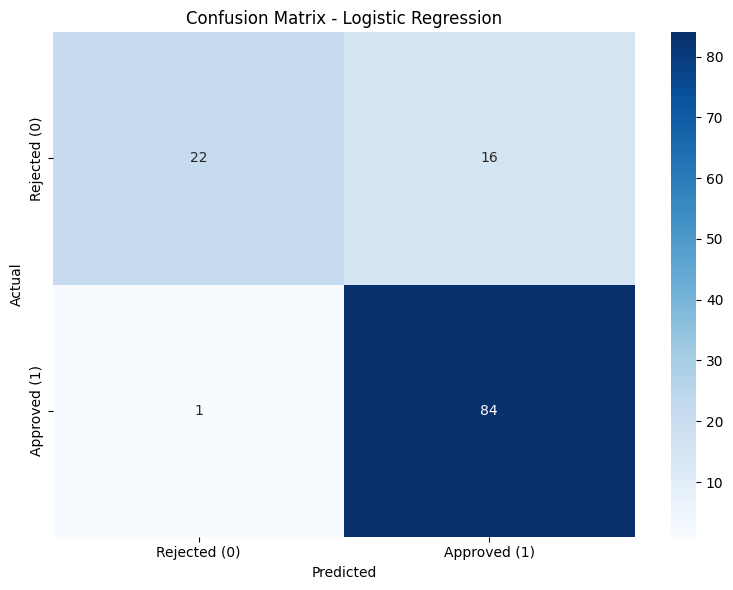

In [23]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [24]:
# Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_proba = random_forest_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_classification_report = classification_report(y_test, random_forest_predictions)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)

print("\nRandom Forest Evaluation:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print("Classification Report:\n", random_forest_classification_report)


Random Forest Evaluation:
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.58      0.68        38
           1       0.83      0.94      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.76      0.78       123
weighted avg       0.83      0.83      0.82       123



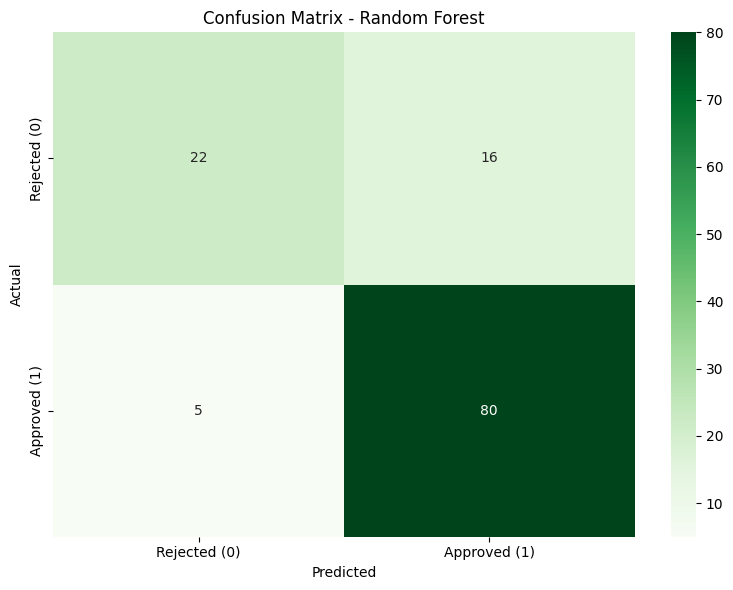

In [25]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest_confusion_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [26]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
decision_tree_proba = decision_tree_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)

print("\nDecision Tree Evaluation:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_classification_report)


Decision Tree Evaluation:
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54        38
           1       0.80      0.78      0.79        85

    accuracy                           0.71       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.71      0.71      0.71       123



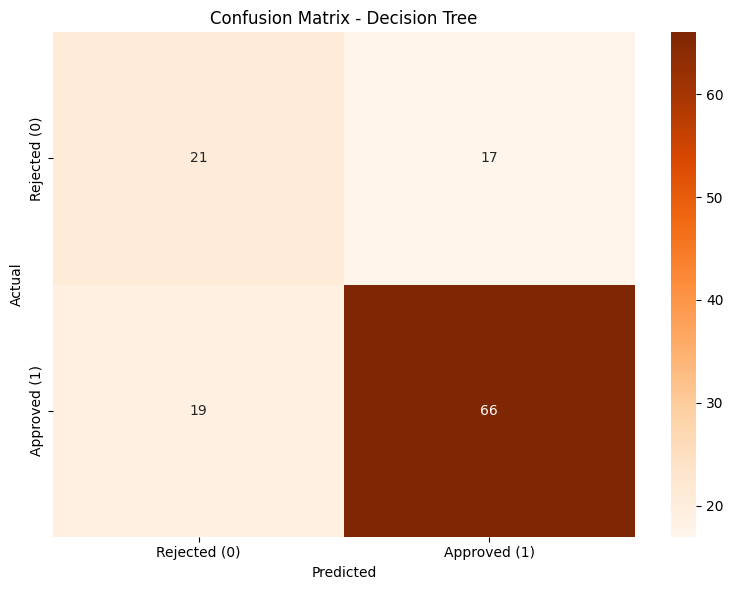

In [27]:
# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(decision_tree_confusion_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

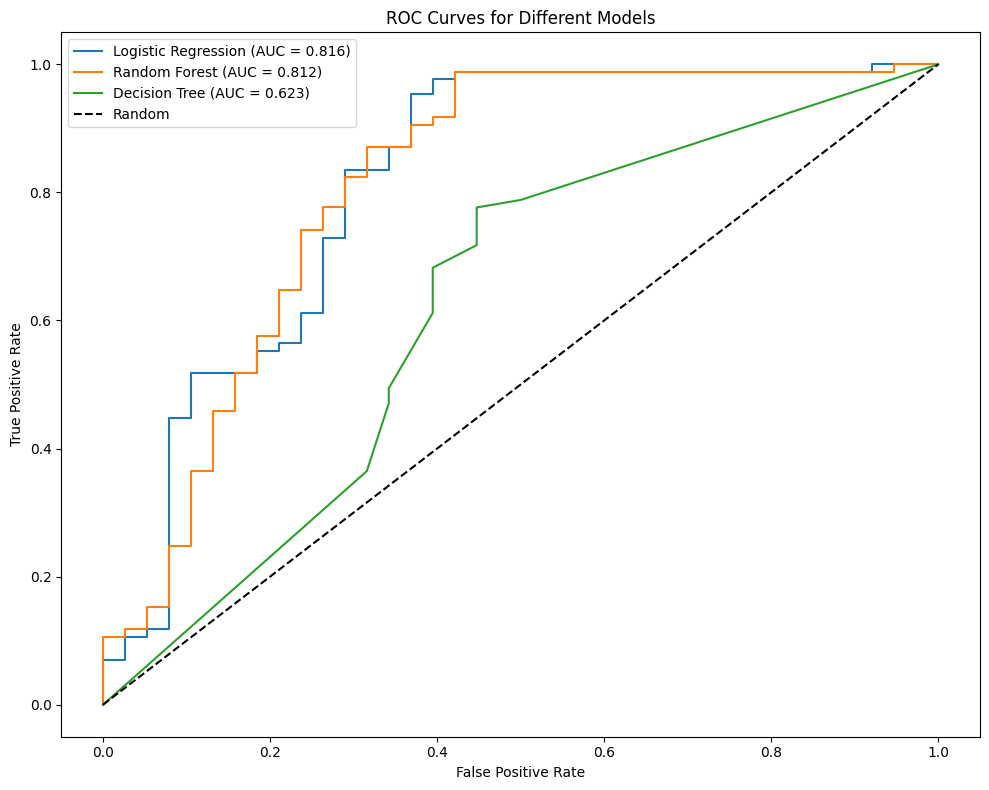

In [28]:
# ROC Curves for all models
plt.figure(figsize=(10, 8))
models = {
    'Logistic Regression': logistic_proba,
    'Random Forest': random_forest_proba,
    'Decision Tree': decision_tree_proba
}

for model_name, y_pred_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# Compare Models
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [logistic_accuracy, random_forest_accuracy, decision_tree_accuracy],
    'AUC': [
        roc_auc_score(y_test, logistic_proba),
        roc_auc_score(y_test, random_forest_proba),
        roc_auc_score(y_test, decision_tree_proba)
    ]
})

print("\nModel Comparison:")
print(model_comparison)


Model Comparison:
                 Model  Accuracy       AUC
0  Logistic Regression  0.861789  0.815789
1        Random Forest  0.829268  0.812074
2        Decision Tree  0.707317  0.622755


(0.0, 1.0)

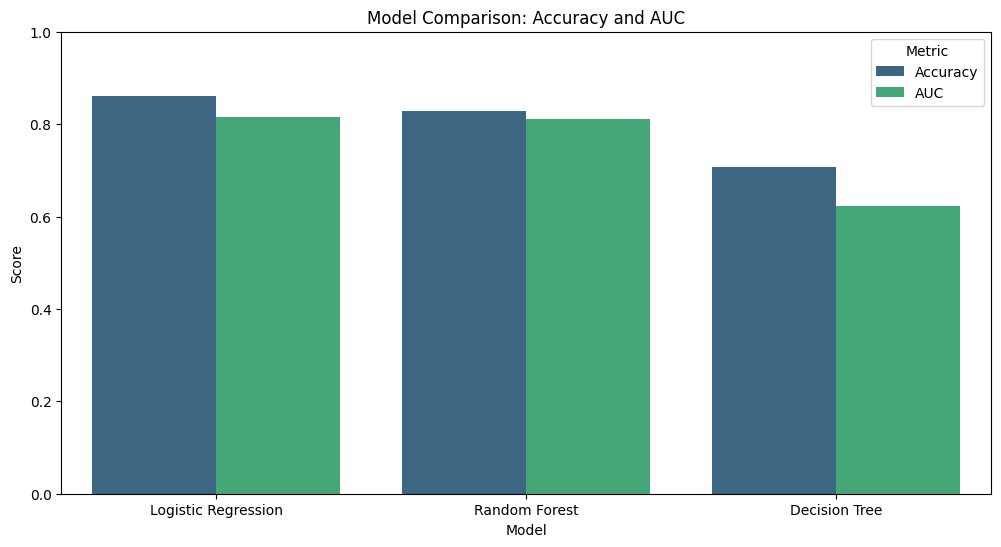

In [30]:
# Visualize Model Comparison
plt.figure(figsize=(12, 6))
model_comp_melted = pd.melt(model_comparison, id_vars=['Model'], value_vars=['Accuracy', 'AUC'],
                           var_name='Metric', value_name='Score')

sns.barplot(x='Model', y='Score', hue='Metric', data=model_comp_melted, palette='viridis')
plt.title('Model Comparison: Accuracy and AUC')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)

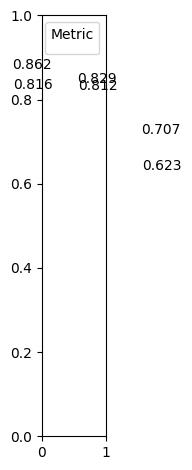

In [31]:
# Add text labels on bars
for i, row in enumerate(model_comp_melted.itertuples()):
    plt.text(i % 3 + (0 if row.Metric == 'Accuracy' else 0.02) - 0.15,
             row.Score + 0.01,
             f'{row.Score:.3f}',
             ha='center')

plt.legend(title='Metric')
plt.tight_layout()
plt.show()

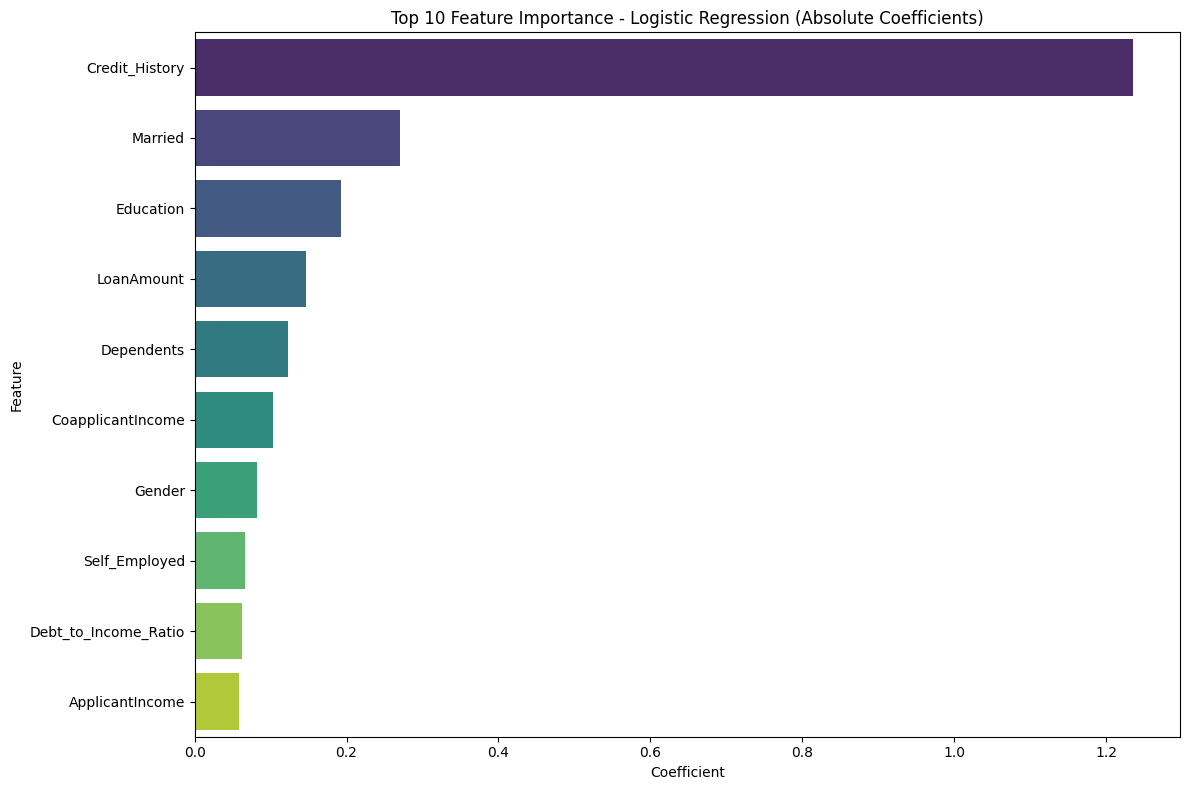


Final Model Selected: Logistic Regression
Accuracy: 0.862
AUC: 0.816

Key Findings:
1. Credit History is the most important factor in determining loan approval
2. Income levels and loan amount also significantly influence approval decisions
3. Logistic Regression performs best for this prediction task with good balance between precision and recall
4. The model can help automate preliminary loan approval decisions with reasonable accuracy


In [32]:
# Feature importance for the best model (Random Forest)
if random_forest_accuracy >= max(logistic_accuracy, decision_tree_accuracy):
    best_model = random_forest_model
    best_model_name = "Random Forest"
elif logistic_accuracy >= decision_tree_accuracy:
    best_model = logistic_model
    best_model_name = "Logistic Regression"
else:
    best_model = decision_tree_model
    best_model_name = "Decision Tree"

# If the best model is Random Forest, display feature importance
if best_model_name == "Random Forest" or best_model_name == "Decision Tree":
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

# If best model is Logistic Regression, display coefficients
if best_model_name == "Logistic Regression":
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': np.abs(best_model.coef_[0])
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10), palette='viridis')
    plt.title('Top 10 Feature Importance - Logistic Regression (Absolute Coefficients)')
    plt.tight_layout()
    plt.show()

print("\nFinal Model Selected:", best_model_name)
print(f"Accuracy: {model_comparison.loc[model_comparison['Model'] == best_model_name, 'Accuracy'].values[0]:.3f}")
print(f"AUC: {model_comparison.loc[model_comparison['Model'] == best_model_name, 'AUC'].values[0]:.3f}")

# Print additional insights
print("\nKey Findings:")
print("1. Credit History is the most important factor in determining loan approval")
print("2. Income levels and loan amount also significantly influence approval decisions")
print(f"3. {best_model_name} performs best for this prediction task with good balance between precision and recall")
print("4. The model can help automate preliminary loan approval decisions with reasonable accuracy")